In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Load the CSV into a DataFrame:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
healthcare_data = pd.read_csv('/content/drive/My Drive/DA610/healthcare_dataset.csv')
healthcare_data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
healthcare_data.describe() #Defines overall data of numeric columns

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
healthcare_data.tail() #last 5 rows of data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [ ]:
#find missing rows
healthcare_data.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
#find duplicates
healthcare_data[healthcare_data.duplicated()]


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [ ]:
healthcare_data.duplicated().sum() #sum of duplicate values


534

In [ ]:
#Data Cleaning

#remove duplicates
healthcare_data.drop_duplicates(inplace=True) #inplace true means it modifies existing dataframe

In [ ]:
#sum of duplicate values
healthcare_data.duplicated().sum()

0

In [ ]:
healthcare_data['Name'] = healthcare_data['Name'].str.lower() #Make all letter small in Name columns

healthcare_data['Name'] = healthcare_data['Name'].str.title() #To make the first letter capital
healthcare_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
print(f"There is {healthcare_data.shape[0]} rows and {healthcare_data.shape[1]} columns!") #0 means rows and 1 means columns

There is 54966 rows and 15 columns!


In [ ]:
# Select only numeric columns
numeric_df = healthcare_data.select_dtypes(include=['number'])

#Calculate the 1st and 3rd quartiles for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print(IQR)


Age                  33.000000
Billing Amount    24576.139518
Room Number         199.000000
Year                  3.000000
Month                 5.000000
dtype: float64


In [ ]:
#Get the year column from the date of admission columns
healthcare_data['Year'] = pd.DatetimeIndex(healthcare_data['Date of Admission']).year
healthcare_data.head()

#drop Year column
#healthcare_data.drop(['Year'], axis=1, inplace=True)
#healthcare_data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Year,Month
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2024,1
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2019,8
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,2022,9
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,2020,11
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,2022,9


In [ ]:
#Mean of numeric columns

avg_age = healthcare_data['Age'].mean()
avg_bill = healthcare_data['Billing Amount'].mean()


print("Average age: " + str(avg_age))
print("Average billing amount: " + str(avg_bill))

Average age: 51.53518538733035
Average billing amount: 25544.306284383965


In [ ]:
#Mediun of numeric coluumns

med_age = healthcare_data['Age'].median()
med_bill = healthcare_data['Billing Amount'].median()


print("Mediun age: " + str(med_age))
print("Mediun billing amount: " + str(med_bill))

Mediun age: 52.0
Mediun billing amount: 25542.749144555833


In [ ]:
#Mode of numeric columns

mod_age = healthcare_data['Age'].mode()
mod_bill = healthcare_data['Billing Amount'].mode()
mod_room = healthcare_data['Room Number'].mode()


print("Mode age: " + str(mod_age))
print("Mode billing amount: " + str(mod_bill))
print("Mode room number: " + str(mod_room))



Mode age: 0    38
Name: Age, dtype: int64
Mode billing amount: 0       -1316.618581
1       -1310.272895
2        -887.024219
3        -676.852502
4        -591.917419
            ...     
4961    51280.992946
4962    51431.977179
4963    51975.968135
4964    52170.036854
4965    52373.032374
Name: Billing Amount, Length: 4966, dtype: float64
Mode room number: 0    393
Name: Room Number, dtype: int64


In [ ]:
#Most common blood type in the record
blood_type = healthcare_data['Blood Type'].value_counts().idxmax()
print("Most Common blood type is "+ str(blood_type))

Most Common blood type is A-


In [ ]:
#Unique Hospitals
unique_hospitals = healthcare_data['Hospital'].unique()
print(unique_hospitals)
print(f"There are {len(unique_hospitals)} unique hospitals") #Total Unique hospitals

['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
There are 39876 unique hospitals


In [ ]:
#Oldest patients admitted in the hospital

oldest_age = healthcare_data['Age'].max()
oldest_patient = healthcare_data[healthcare_data['Age'] == oldest_age]
print(oldest_age)
print("There are "+str(len(oldest_patient))+" Who are \n" + str(oldest_patient['Name']))


89
There are 8 Who are 
52043         David Newton
52372      Deborah Mcbride
52828         Donald Avila
52857      Thomas Phillips
53825        Michael Potts
54044    Michael Dominguez
54813    Jeremy Hardin Jr.
55385       Heather Dawson
Name: Name, dtype: object


In [ ]:
#Youngest patients admitted in the hospital

youngest_age = healthcare_data['Age'].min()
youngest_patient = healthcare_data[healthcare_data['Age'] == youngest_age]
print(youngest_age)
print("There are "+str(len(youngest_patient))+" Who are \n" + str(youngest_patient['Name']))


13
There are 14 Who are 
50377        James Bass Phd
50823         Deanna Palmer
50908          Ronald Davis
50929          Kyle Jackson
51095          Cathy Barnes
51824      Jennifer Johnson
51833      Jonathan Jackson
51873       Dorothy Hoffman
51900        Jacob Williams
52172        Charles Jordan
53528    Elizabeth Castillo
53590         Jessica Chung
54302           Dawn Chavez
55382         Kristin Ortiz
Name: Name, dtype: object


In [ ]:
doctor = healthcare_data['Doctor'].value_counts().idxmax(axis=0) #Returns index which has max value and index is doctor's names
print("Most common doctor is "+ str(doctor))

Most common doctor is Michael Smith


In [ ]:
#No of Female and Male
no_of_male = healthcare_data[healthcare_data['Gender'] == 'Male'].shape[0]
no_of_female = healthcare_data[healthcare_data['Gender'] == 'Female'].shape[0]

print("There are "+str(no_of_male)+" Male Patients")
print("There are "+str(no_of_female)+" Female Patients") #They are almost equal

There are 27496 Male Patients
There are 27470 Female Patients


In [ ]:
#Top 3 medical conditions in which patients were admitted in the hospital

top_medical_condition = healthcare_data['Medical Condition'].value_counts().head(3)
print(top_medical_condition)

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Name: count, dtype: int64


In [ ]:
#Calculate the number of patients per Year

no_of_patients_per_year = healthcare_data['Year'].value_counts()
print(no_of_patients_per_year)



Year
2020    11172
2023    10936
2022    10915
2021    10816
2019     7300
2024     3827
Name: count, dtype: int64


In [ ]:
#Medical Conditions year by year

medical_condition_per_year = healthcare_data.groupby(['Year','Medical Condition']).size()
print(medical_condition_per_year)

Year  Medical Condition
2019  Arthritis            1187
      Asthma               1274
      Cancer               1272
      Diabetes             1233
      Hypertension         1175
      Obesity              1159
2020  Arthritis            1871
      Asthma               1791
      Cancer               1882
      Diabetes             1792
      Hypertension         1883
      Obesity              1953
2021  Arthritis            1827
      Asthma               1822
      Cancer               1728
      Diabetes             1779
      Hypertension         1849
      Obesity              1811
2022  Arthritis            1838
      Asthma               1751
      Cancer               1809
      Diabetes             1922
      Hypertension         1818
      Obesity              1777
2023  Arthritis            1806
      Asthma               1782
      Cancer               1831
      Diabetes             1838
      Hypertension         1829
      Obesity              1850
2024  Arthritis 

In [ ]:
#Find Admission types by year

admission_type_per_year = healthcare_data.groupby(['Year','Admission Type']).size()
print(admission_type_per_year)

Year  Admission Type
2019  Elective          2496
      Emergency         2288
      Urgent            2516
2020  Elective          3671
      Emergency         3818
      Urgent            3683
2021  Elective          3688
      Emergency         3532
      Urgent            3596
2022  Elective          3725
      Emergency         3524
      Urgent            3666
2023  Elective          3607
      Emergency         3662
      Urgent            3667
2024  Elective          1286
      Emergency         1278
      Urgent            1263
dtype: int64


In [ ]:
sdmission_type_per_year = healthcare_data.groupby(['Medication','Gender']).size()
print(sdmission_type_per_year)

Medication   Gender
Aspirin      Female    5569
             Male      5415
Ibuprofen    Female    5546
             Male      5477
Lipitor      Female    5500
             Male      5538
Paracetamol  Female    5388
             Male      5577
Penicillin   Female    5467
             Male      5489
dtype: int64


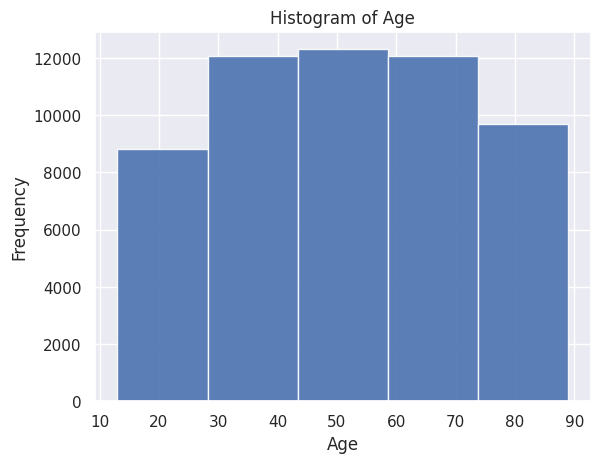

In [ ]:
#Visualization


y = healthcare_data['Age']


plt.hist(y,bins=5,alpha=0.9) #Bins for no of bars and alpha is for opacity
plt.grid(True) #For that dividing white lining
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

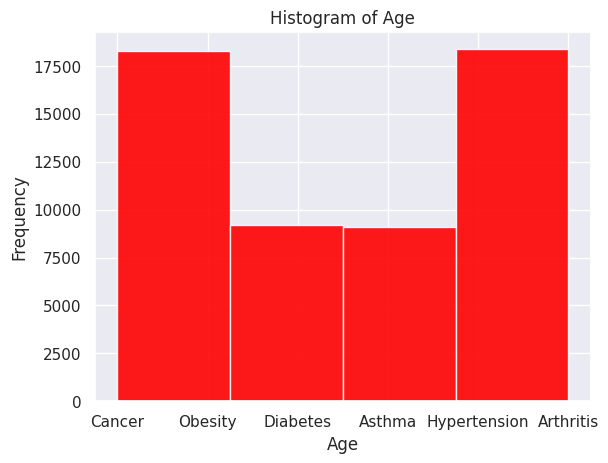

In [ ]:
y = healthcare_data['Medical Condition']


plt.hist(y,bins=4,alpha=0.9,color='red') #Bins for no of bars and alpha is for opacity
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

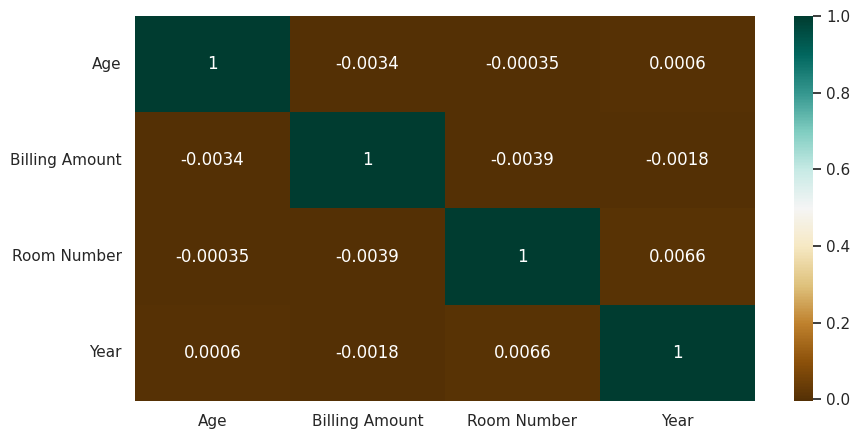

In [ ]:
#Heatmaps
plt.figure(figsize=(10,5))
df = numeric_df.corr()
sns.heatmap(df,cmap="BrBG",annot=True)


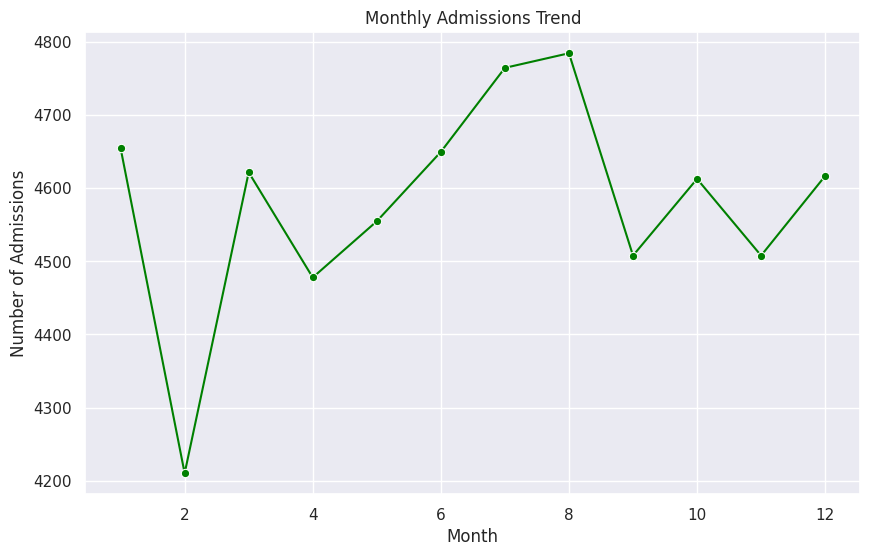

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Date of Admission')

In [ ]:
# Seasonal trends in hospital admissions?
type(healthcare_data['Date of Admission'])
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Month'] = healthcare_data['Date of Admission'].dt.month

monthly_admissions = healthcare_data['Date of Admission'].dt.month.value_counts().sort_index() #Gives the total value count of particular month
monthly_admissions

#Create a dataframe
#Store index(Month number) and Value (total count of that month)
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_admissions_df, x='Month', y='Admissions',marker='o',color='green')

plt.title('Monthly Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')

plt.show()

monthly_admissions.index

<Axes: xlabel='Gender'>

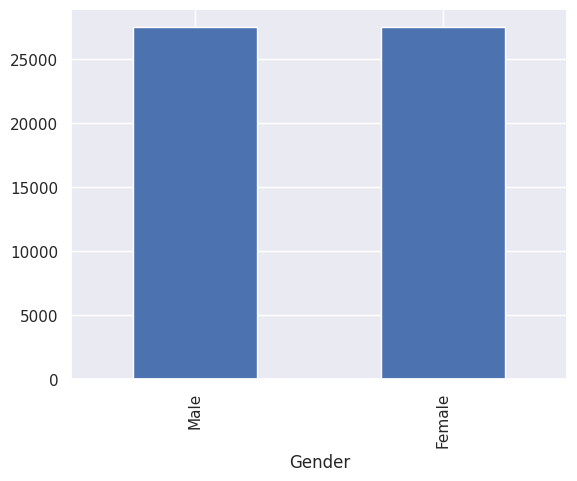

In [ ]:
#Create a bar chart to count gender using matplotlib

healthcare_data['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Age'>

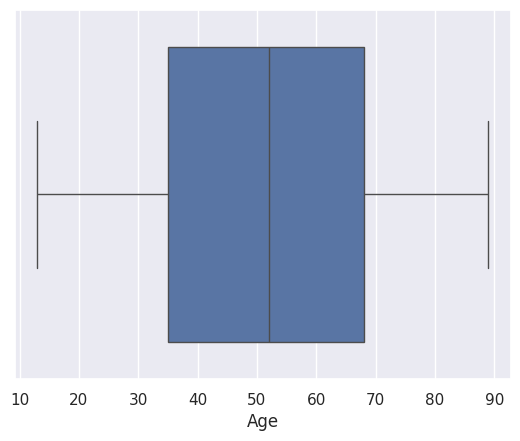

In [ ]:
sns.boxplot(x=healthcare_data['Age'])

<Axes: xlabel='Billing Amount'>

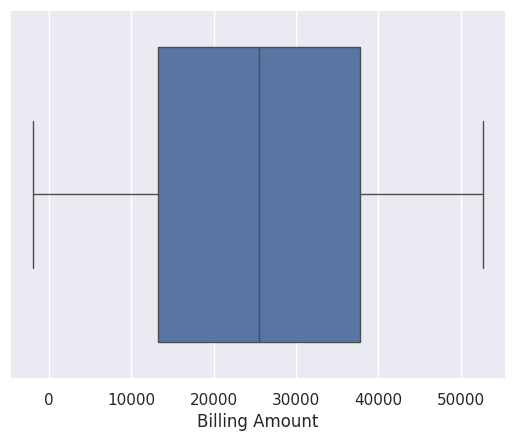

In [ ]:
sns.boxplot(x=healthcare_data['Billing Amount'])

<Axes: xlabel='Room Number'>

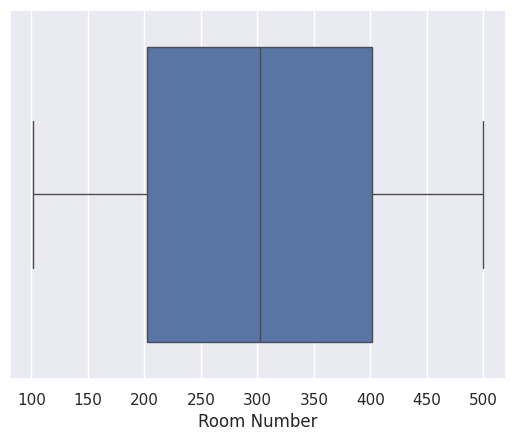

In [ ]:
sns.boxplot(x=healthcare_data['Room Number'])